----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                                                                            FINAL PROJECT

                                                                    IQBAL HADI PRATIKTO (071628)

                                                                DATA VISUALISASI BOOKING PRODUCT PBF

**********************************************************************************************************************************************************************************

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import statistics as stats
import scipy.stats
from scipy.stats import uniform
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])
import math


In [2]:
Data=pd.read_csv('Data.csv')

Read file csv yang akan diolah

In [3]:
Data.head()

,Branch,Main Customer Purpose,Customer Economy Sector,Customer Marital,Main Customer Profession,Gender,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total Amount
0,Cabang BALIKPAPAN,Consumtive,PERTAMBANGAN,Married,Wiraswasta,Female,NaN,NaN,NaN,1.050000e+09,NaN,NaN,NaN,NaN,NaN,1.050000e+09
1,Cabang BALIKPAPAN,Consumtive,PERTAMBANGAN,Married,Karyawan Swasta,Male,NaN,NaN,130000000.0,4.500000e+08,NaN,NaN,NaN,NaN,NaN,5.800000e+08
2,Cabang BALIKPAPAN,Consumtive,PERDAGANGAN & DISTRIBUSI,Married,Wiraswasta,Male,NaN,NaN,NaN,2.500000e+08,NaN,NaN,NaN,NaN,NaN,2.500000e+08
3,Cabang BALIKPAPAN,Consumtive,PERDAGANGAN & DISTRIBUSI,Married,Wiraswasta,Female,NaN,NaN,75000000.0,NaN,NaN,NaN,NaN,NaN,NaN,7.500000e+07
4,Cabang BALIKPAPAN,Consumtive,JASA,Married,Karyawan Swasta,Male,NaN,NaN,350000000.0,NaN,NaN,NaN,NaN,NaN,NaN,3.500000e+08


Menampilkan 5 data teratas

In [4]:
Data.tail()

,Branch,Main Customer Purpose,Customer Economy Sector,Customer Marital,Main Customer Profession,Gender,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total Amount
1990,Cabang YOGYAKARTA,Consumtive,EMPLOYEE,Married,Karyawan Swasta,Female,NaN,NaN,1.500000e+08,5.000000e+07,NaN,NaN,NaN,NaN,NaN,2.000000e+08
1991,Cabang YOGYAKARTA,Productive,PERDAGANGAN & DISTRIBUSI,Married,Wiraswasta,Male,NaN,NaN,NaN,1.500000e+08,NaN,NaN,NaN,NaN,NaN,1.500000e+08
1992,Cabang YOGYAKARTA,Productive,PERDAGANGAN & DISTRIBUSI,Married,Formal Lainnya,Female,NaN,NaN,NaN,1.450000e+08,NaN,NaN,NaN,NaN,NaN,1.450000e+08
1993,Cabang YOGYAKARTA,Productive,JASA,Married,Wiraswasta,Female,NaN,NaN,1.500000e+08,NaN,NaN,NaN,NaN,NaN,NaN,1.500000e+08
1994,Grand Total,NaN,NaN,NaN,NaN,NaN,1.903816e+10,1.250000e+11,1.790000e+11,1.890000e+11,1.380000e+11,2.120000e+11,1.030000e+11,2.070000e+11,1.810000e+11,1.350000e+12


Menampilkan 5 data terbawah

In [5]:
Data.shape

(1995, 16)

Terdapat 1994 baris dan 14 kolom

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Branch                    1995 non-null   object 
 1   Main Customer Purpose     1994 non-null   object 
 2   Customer Economy Sector   1994 non-null   object 
 3   Customer Marital          1994 non-null   object 
 4   Main Customer Profession  1994 non-null   object 
 5   Gender                    1994 non-null   object 
 6   2014                      46 non-null     float64
 7   2015                      243 non-null    float64
 8   2016                      558 non-null    float64
 9   2017                      654 non-null    float64
 10  2018                      209 non-null    float64
 11  2019                      336 non-null    float64
 12  2020                      246 non-null    float64
 13  2021                      358 non-null    float64
 14  2022    

Melihat info data dan masih ada data null

In [7]:
Data.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total Amount
count,4.600000e+01,2.430000e+02,5.580000e+02,6.540000e+02,2.090000e+02,3.360000e+02,2.460000e+02,3.580000e+02,3.450000e+02,1.995000e+03
mean,8.277460e+08,1.029667e+09,6.414831e+08,5.786883e+08,1.319959e+09,1.263141e+09,8.387228e+08,1.156401e+09,1.049768e+09,1.355605e+09
std,2.767744e+09,8.017323e+09,7.575024e+09,7.386766e+09,9.532524e+09,1.155467e+10,6.553319e+09,1.092390e+10,9.733458e+09,3.023316e+10
min,7.500000e+07,5.000000e+07,4.000000e+07,5.000000e+07,5.000000e+07,5.000000e+07,5.000000e+07,7.000000e+07,7.000000e+07,4.000000e+07
25%,1.752500e+08,1.577922e+08,1.100000e+08,1.050000e+08,1.750000e+08,2.000000e+08,1.600000e+08,2.036250e+08,1.988000e+08,1.500000e+08
50%,3.675000e+08,3.000000e+08,2.000000e+08,1.997250e+08,3.600000e+08,3.700000e+08,2.750000e+08,4.000000e+08,3.500000e+08,3.000000e+08
75%,4.975000e+08,5.500000e+08,3.579625e+08,3.397500e+08,8.500000e+08,8.000000e+08,5.000000e+08,7.345665e+08,6.500000e+08,7.000000e+08
max,1.903816e+10,1.250000e+11,1.790000e+11,1.890000e+11,1.380000e+11,2.120000e+11,1.030000e+11,2.070000e+11,1.810000e+11,1.350000e+12


Melihat Describe dari data yang ada

In [8]:
Data['2014'] = Data['2014'].replace(np.nan, 0)
Data['2015'] = Data['2015'].replace(np.nan, 0)
Data['2016'] = Data['2016'].replace(np.nan, 0)
Data['2017'] = Data['2017'].replace(np.nan, 0)
Data['2018'] = Data['2018'].replace(np.nan, 0)
Data['2019'] = Data['2019'].replace(np.nan, 0)
Data['2020'] = Data['2020'].replace(np.nan, 0)
Data['2021'] = Data['2021'].replace(np.nan, 0)
Data['2022'] = Data['2022'].replace(np.nan, 0)

Mengubah data pada kolom tahun yang nan menjadi 0

In [9]:
Data['2014'] = Data['2014'].astype("int64")
Data['2015'] = Data['2015'].astype("int64")
Data['2016'] = Data['2016'].astype("int64")
Data['2017'] = Data['2017'].astype("int64")
Data['2018'] = Data['2018'].astype("int64")
Data['2019'] = Data['2019'].astype("int64")
Data['2020'] = Data['2020'].astype("int64")
Data['2021'] = Data['2021'].astype("int64")
Data['2022'] = Data['2022'].astype("int64")

Mengubah tipe data ke int

In [10]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Branch                    1995 non-null   object 
 1   Main Customer Purpose     1994 non-null   object 
 2   Customer Economy Sector   1994 non-null   object 
 3   Customer Marital          1994 non-null   object 
 4   Main Customer Profession  1994 non-null   object 
 5   Gender                    1994 non-null   object 
 6   2014                      1995 non-null   int64  
 7   2015                      1995 non-null   int64  
 8   2016                      1995 non-null   int64  
 9   2017                      1995 non-null   int64  
 10  2018                      1995 non-null   int64  
 11  2019                      1995 non-null   int64  
 12  2020                      1995 non-null   int64  
 13  2021                      1995 non-null   int64  
 14  2022    

Pengecekan apakah sudah berubah atau belum type datanya

In [11]:
Data.head()

,Branch,Main Customer Purpose,Customer Economy Sector,Customer Marital,Main Customer Profession,Gender,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total Amount
0,Cabang BALIKPAPAN,Consumtive,PERTAMBANGAN,Married,Wiraswasta,Female,0,0,0,1050000000,0,0,0,0,0,1.050000e+09
1,Cabang BALIKPAPAN,Consumtive,PERTAMBANGAN,Married,Karyawan Swasta,Male,0,0,130000000,450000000,0,0,0,0,0,5.800000e+08
2,Cabang BALIKPAPAN,Consumtive,PERDAGANGAN & DISTRIBUSI,Married,Wiraswasta,Male,0,0,0,250000000,0,0,0,0,0,2.500000e+08
3,Cabang BALIKPAPAN,Consumtive,PERDAGANGAN & DISTRIBUSI,Married,Wiraswasta,Female,0,0,75000000,0,0,0,0,0,0,7.500000e+07
4,Cabang BALIKPAPAN,Consumtive,JASA,Married,Karyawan Swasta,Male,0,0,350000000,0,0,0,0,0,0,3.500000e+08


Pengecekan data apa sudah tidak ada nan dan udah diubah data typenya

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Pertanyaan (1) :
Apakah ada perubahan pada booking pada product PBF dari tahun 2014 sampai 2022 ?

In [12]:
Data_1 = Data.groupby(Data["Branch"], axis = 0).sum()
Data_1


,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total Amount
Branch,,,,,,,,,,
Cabang BALIKPAPAN,0,0,4140000000,6305000000,0,0,0,0,0,1.044500e+10
Cabang BANDUNG,0,0,5320300000,4529500000,0,0,0,0,0,9.849800e+09
Cabang BATAM,0,0,0,250000000,0,0,0,0,0,2.500000e+08
Cabang BEKASI,0,0,3398000000,7531930000,0,0,0,0,0,1.092993e+10
Cabang BEKASI 2,0,0,555000000,2674500000,0,5008000000,9000600000,18904000000,12576000000,4.871810e+10
...,...,...,...,...,...,...,...,...,...,...
Cabang TANGERANG,0,0,2270000000,7466000000,0,17103300000,7602655000,22381377550,13458629600,7.028196e+10
Cabang TANGERANG 6,0,0,0,0,0,0,1028000000,0,0,1.028000e+09
Cabang TANJUNG PINANG,0,0,0,210100000,0,0,0,0,0,2.101000e+08


In [13]:
years = list(map(str, range(2014, 2023)))
years

['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

In [14]:
Grand_Total = Data_1.loc['Grand Total', years]
Grand_Total

2014    1.903816e+10
2015    1.250000e+11
2016    1.790000e+11
2017    1.890000e+11
2018    1.380000e+11
2019    2.120000e+11
2020    1.030000e+11
2021    2.070000e+11
2022    1.810000e+11
Name: Grand Total, dtype: float64

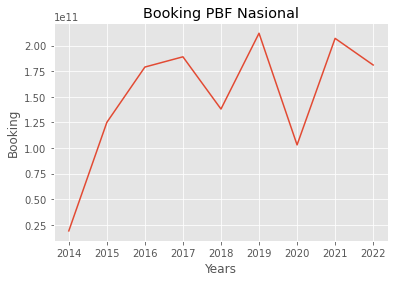

In [15]:
Grand_Total.plot(kind='line')

plt.title('Booking PBF Nasional')
plt.ylabel('Booking')
plt.xlabel('Years') 

plt.show() 

Terlihat ada penurunan pada tahun 2018 dan 2020

In [16]:
Cek_Cabang = Data_1[(Data_1["2019"] == 0) & (Data_1["2020"] == 0) & (Data_1["2021"] == 0) & (Data_1["2022"] == 0)]
Cek_Cabang

,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total Amount
Branch,,,,,,,,,,
Cabang BALIKPAPAN,0,0,4140000000,6305000000,0,0,0,0,0,1.044500e+10
Cabang BANDUNG,0,0,5320300000,4529500000,0,0,0,0,0,9.849800e+09
Cabang BATAM,0,0,0,250000000,0,0,0,0,0,2.500000e+08
Cabang BEKASI,0,0,3398000000,7531930000,0,0,0,0,0,1.092993e+10
Cabang BEKASI 3,0,0,433500000,2573000000,0,0,0,0,0,3.006500e+09
Cabang BOGOR,0,0,5793150000,7552841800,0,0,0,0,0,1.334599e+10
Cabang BONTANG,0,0,0,3711776000,0,0,0,0,0,3.711776e+09
Cabang CENGKARENG,0,0,0,3210480000,0,0,0,0,0,3.210480e+09
Cabang CIBINONG,0,0,0,1384000000,0,0,0,0,0,1.384000e+09


In [17]:
Cek_Cabang.shape

(56, 10)

Jawaban Pertanyaan (1) :
Penurunan Booking terjadi pada 2018 karena pada saat itu terjadi stop booking sebanyak 56 Cabang hingga sekarang, sedangkan di 2020 karena covid19

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Pertanyaan (2) :
Dimana 5 cabang dengan booking terbanyak hingga saat ini ?

In [18]:
Data_2 = Data.groupby(Data["Branch"], axis = 0).sum()
Data_2.sort_values(by='Total Amount', ascending=False, inplace=True)
Data_2.drop(["Grand Total"], axis=0, inplace=True)
Data_2.drop(["Total Amount"], axis=1, inplace=True)
Data_2.head(5)

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Branch,,,,,,,,,
Cabang Serpong - Tangerang Selatan,0,0,12532000000,30538500000,33912580000,47547848800,10175367000,23059500000,20766860000
Cabang BEKASI 4,0,0,0,7013515200,31205115000,36800437800,14217855000,23972750000,23687500000
Cabang SIDOARJO,0,0,0,9275000000,26089300000,32345500000,12191000000,20512400000,20897375000
Cabang DEPOK,0,0,4650000000,8087048000,22002380000,30874472000,11387000000,14643350000,11913850000
Cabang JAKARTA SELATAN 2,0,0,0,3008000000,24662000000,23249500000,11307991000,14865952000,14631590000


Text(0.5, 0, 'Years')

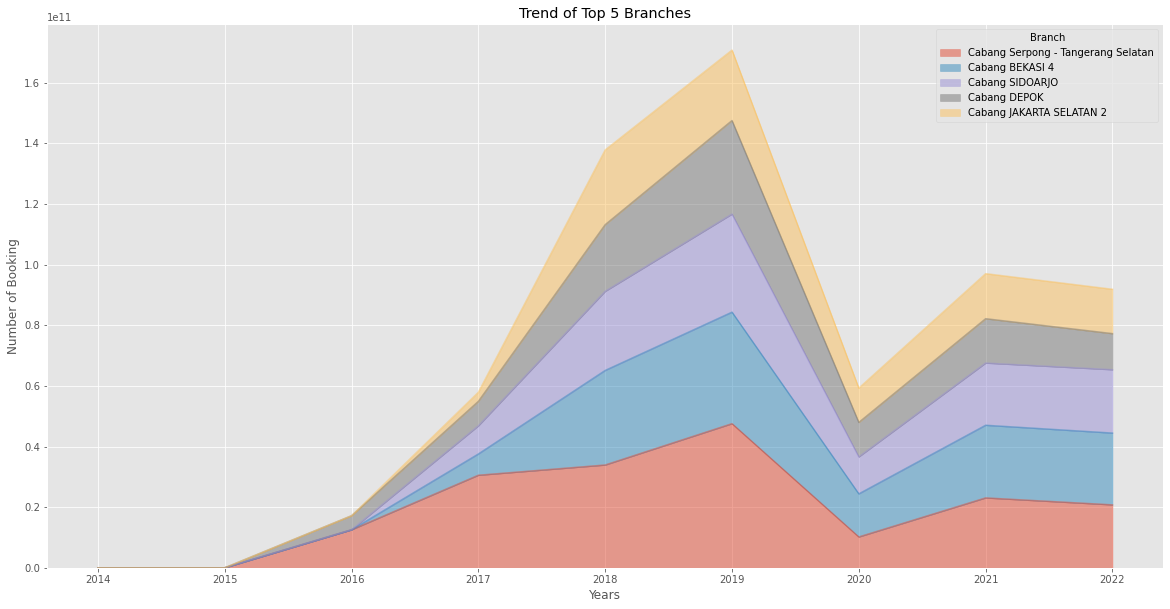

In [19]:
Data_Top5 = Data_2.head(5)
Data_Top5 = Data_Top5[years].transpose() 

Data_Top5.index = Data_Top5.index.map(int)

ax = Data_Top5.plot(kind='area',alpha=0.5, figsize=(20, 10))

ax.set_title('Trend of Top 5 Branches')
ax.set_ylabel('Number of Booking')
ax.set_xlabel('Years')

#plt.show()

Jawaban Pertanyaan (2) :
Booking terbanyak ada di Cabang Serpong - Tangsel, Bekasi 4, Sidoarjo, Depok dan Jakarta Selatan 2

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Pertanyaan (3) :
Pada Tahun Berapa dari Kelima Cabang Top paling banyak booking ?

In [20]:
Data_Top5

Branch,Cabang Serpong - Tangerang Selatan,Cabang BEKASI 4,Cabang SIDOARJO,Cabang DEPOK,Cabang JAKARTA SELATAN 2
2014,0,0,0,0,0
2015,0,0,0,0,0
2016,12532000000,0,0,4650000000,0
2017,30538500000,7013515200,9275000000,8087048000,3008000000
2018,33912580000,31205115000,26089300000,22002380000,24662000000
2019,47547848800,36800437800,32345500000,30874472000,23249500000
2020,10175367000,14217855000,12191000000,11387000000,11307991000
2021,23059500000,23972750000,20512400000,14643350000,14865952000
2022,20766860000,23687500000,20897375000,11913850000,14631590000


array([<AxesSubplot:ylabel='Cabang Serpong - Tangerang Selatan'>,
       <AxesSubplot:ylabel='Cabang BEKASI 4'>,
       <AxesSubplot:ylabel='Cabang SIDOARJO'>,
       <AxesSubplot:ylabel='Cabang DEPOK'>,
       <AxesSubplot:ylabel='Cabang JAKARTA SELATAN 2'>], dtype=object)

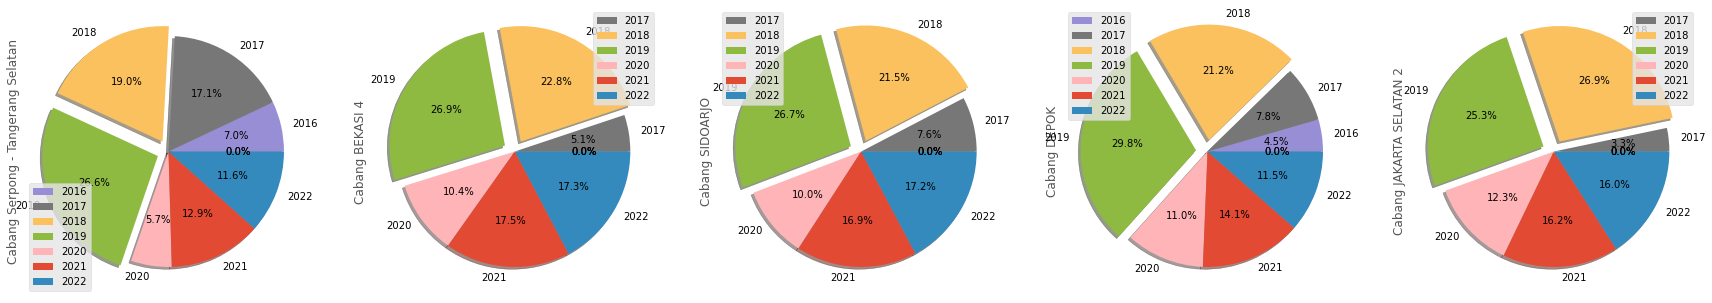

In [21]:
from pickle import TRUE

explode_list = [0,0,0,0,0.1,0.1,0,0,0]
Data_Top5.plot(kind='pie', figsize=(30,10), autopct="%1.1f%%", shadow = True, startangle=0, subplots=TRUE, explode=explode_list)

JAWABAN  PERTANYAAN (3) :
Dilihat dari kelima grafik diatas, kelima Cabang Portion terbesar ada pada tahun 2019 dan 2018

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [22]:
Data_2

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Branch,,,,,,,,,
Cabang Serpong - Tangerang Selatan,0,0,12532000000,30538500000,33912580000,47547848800,10175367000,23059500000,20766860000
Cabang BEKASI 4,0,0,0,7013515200,31205115000,36800437800,14217855000,23972750000,23687500000
Cabang SIDOARJO,0,0,0,9275000000,26089300000,32345500000,12191000000,20512400000,20897375000
Cabang DEPOK,0,0,4650000000,8087048000,22002380000,30874472000,11387000000,14643350000,11913850000
Cabang JAKARTA SELATAN 2,0,0,0,3008000000,24662000000,23249500000,11307991000,14865952000,14631590000
...,...,...,...,...,...,...,...,...,...
Cabang TANGERANG 6,0,0,0,0,0,0,1028000000,0,0
Cabang JAKARTA SELATAN 3,0,0,0,580000000,0,0,0,0,0
Cabang BATAM,0,0,0,250000000,0,0,0,0,0


Text(0.5, 1.0, 'Booking PBF 2021 - 2022')

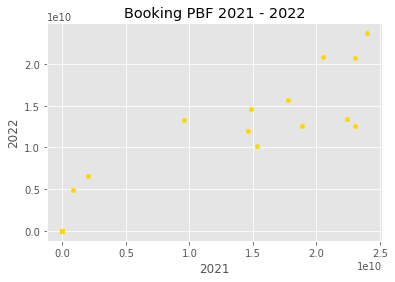

In [23]:
Data_2.plot(kind="scatter", x=7, y=8, color='gold')
plt.title('Booking PBF 2021 - 2022')

Scatter Booking 2021 dan 2022

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [24]:
Normal_Distribution = Data_2[(Data_2["2022"] > 0)]
Normal_Distribution = Normal_Distribution.drop(["2014"], axis=1)
Normal_Distribution = Normal_Distribution.drop(["2015"], axis=1)
Normal_Distribution

,2016,2017,2018,2019,2020,2021,2022
Branch,,,,,,,
Cabang Serpong - Tangerang Selatan,12532000000,30538500000,33912580000,47547848800,10175367000,23059500000,20766860000
Cabang BEKASI 4,0,7013515200,31205115000,36800437800,14217855000,23972750000,23687500000
Cabang SIDOARJO,0,9275000000,26089300000,32345500000,12191000000,20512400000,20897375000
Cabang DEPOK,4650000000,8087048000,22002380000,30874472000,11387000000,14643350000,11913850000
Cabang JAKARTA SELATAN 2,0,3008000000,24662000000,23249500000,11307991000,14865952000,14631590000
Cabang TANGERANG,2270000000,7466000000,0,17103300000,7602655000,22381377550,13458629600
Cabang BEKASI 2,555000000,2674500000,0,5008000000,9000600000,18904000000,12576000000
Cabang SURABAYA,2344000000,6288000000,0,8852369400,6225840000,9566580000,13300000000
Cabang BEKASI 5,1050500000,2726200000,0,0,6061000000,23068500000,12557000000


In [25]:
Normal_Distribution.shape

(13, 7)

Ada 13 Cabang Aktif yang masih booking

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

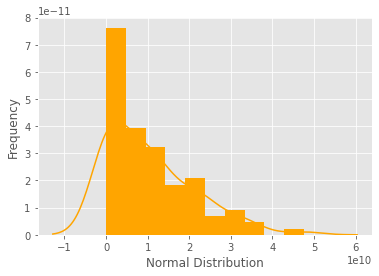

In [26]:
ax = sns.distplot(Normal_Distribution,
                  bins=10,
                  kde=True,
                  color='orange',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

Distribusi Normal Booking Cabang Aktif PBF

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

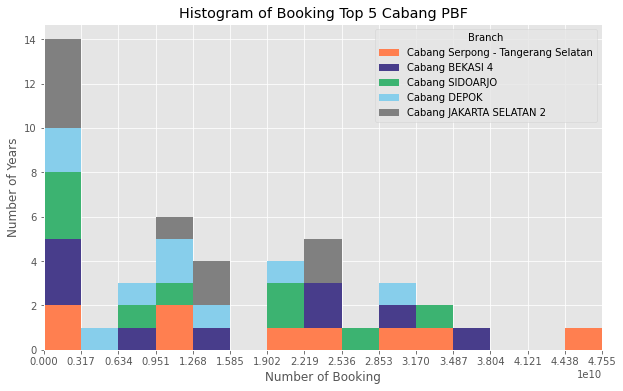

In [27]:
count, bin_edges = np.histogram(Data_Top5, 15)
xmin = bin_edges[0] - 10   
xmax = bin_edges[-1] + 10  


Data_Top5.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen','skyblue','grey'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Booking Top 5 Cabang PBF')
plt.ylabel('Number of Years')
plt.xlabel('Number of Booking') 

plt.show()

Histogram Top 5 Booking Dari PBF

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Pertanyaan :
Customer Economy Sector mana yang terbanyak bookingnya ?

In [28]:
Data.head()

,Branch,Main Customer Purpose,Customer Economy Sector,Customer Marital,Main Customer Profession,Gender,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total Amount
0,Cabang BALIKPAPAN,Consumtive,PERTAMBANGAN,Married,Wiraswasta,Female,0,0,0,1050000000,0,0,0,0,0,1.050000e+09
1,Cabang BALIKPAPAN,Consumtive,PERTAMBANGAN,Married,Karyawan Swasta,Male,0,0,130000000,450000000,0,0,0,0,0,5.800000e+08
2,Cabang BALIKPAPAN,Consumtive,PERDAGANGAN & DISTRIBUSI,Married,Wiraswasta,Male,0,0,0,250000000,0,0,0,0,0,2.500000e+08
3,Cabang BALIKPAPAN,Consumtive,PERDAGANGAN & DISTRIBUSI,Married,Wiraswasta,Female,0,0,75000000,0,0,0,0,0,0,7.500000e+07
4,Cabang BALIKPAPAN,Consumtive,JASA,Married,Karyawan Swasta,Male,0,0,350000000,0,0,0,0,0,0,3.500000e+08


In [29]:
Customer_Economy = Data.groupby(Data["Customer Economy Sector"], axis = 0).sum()
Customer_Economy = Customer_Economy["Total Amount"]
Customer_Economy = Customer_Economy.sort_values(ascending=False)
Customer_Economy

Customer Economy Sector
JASA                                    4.654460e+11
INDUSTRI/MANUFACTURING                  2.178186e+11
PERDAGANGAN & DISTRIBUSI                1.957762e+11
EMPLOYEE                                1.194437e+11
KONTRUKSI                               9.566051e+10
TRANSPORTASI                            5.701592e+10
PERDAGANGAN ECERAN                      4.670769e+10
PERTAMBANGAN                            4.177768e+10
PEGAWAI NEGERI                          3.935634e+10
PERDAGANGAN BESAR                       3.870628e+10
PETERNAKAN & PERIKANAN                  9.551157e+09
PERKEBUNAN                              7.678000e+09
PERDAGANGAN EKSPOR-IMPOR                6.695000e+09
PERTANIAN & PERKEBUNAN                  5.439000e+09
PERHUTANAN                              3.284500e+09
PERTANIAN                               2.594500e+09
KEGIATAN YANG BELUM JELAS BATASANNYA    1.480000e+09
Name: Total Amount, dtype: float64

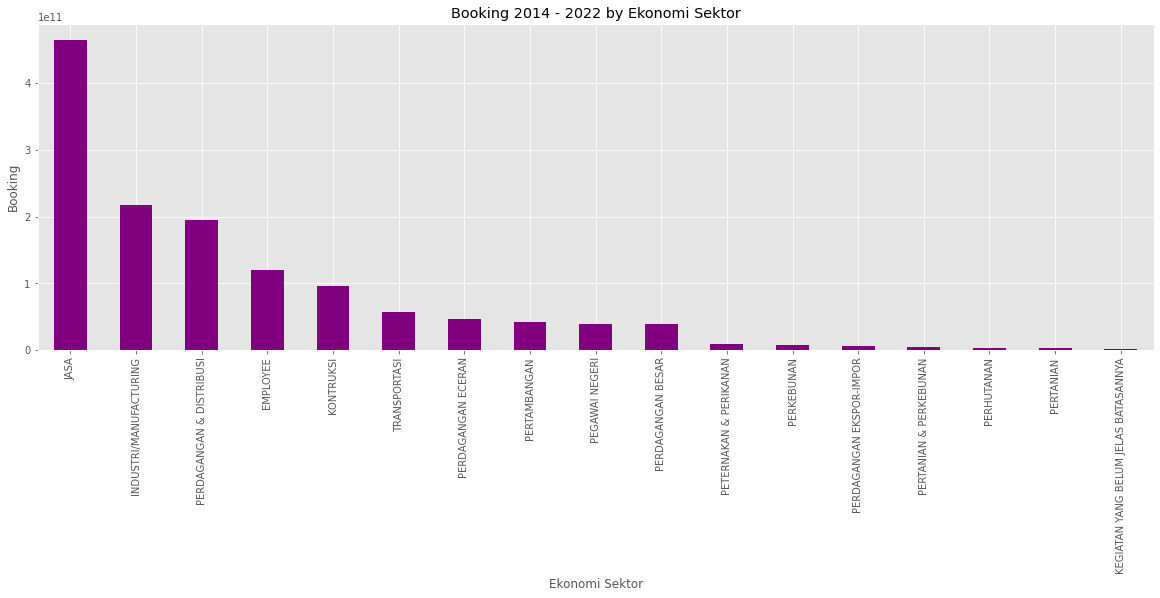

In [30]:
Customer_Economy.plot(kind='bar', color = ("purple"), figsize=(20, 6))

plt.xlabel('Ekonomi Sektor') 
plt.ylabel('Booking') 
plt.title('Booking 2014 - 2022 by Ekonomi Sektor') 

plt.show()

JAWABAN : Booking Ekonomi Sektor Terbanyak adalah di JASA

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Pertanyaan :
Berapa persen laki-laki dan perempuan pada booking total dari 2014 sampai 2022 ?

In [31]:
Gender = Data.groupby(Data["Gender"], axis = 0).sum()
Gender = Gender["Total Amount"]
Gender

Gender
Female    4.232723e+11
Male      9.311588e+11
Name: Total Amount, dtype: float64

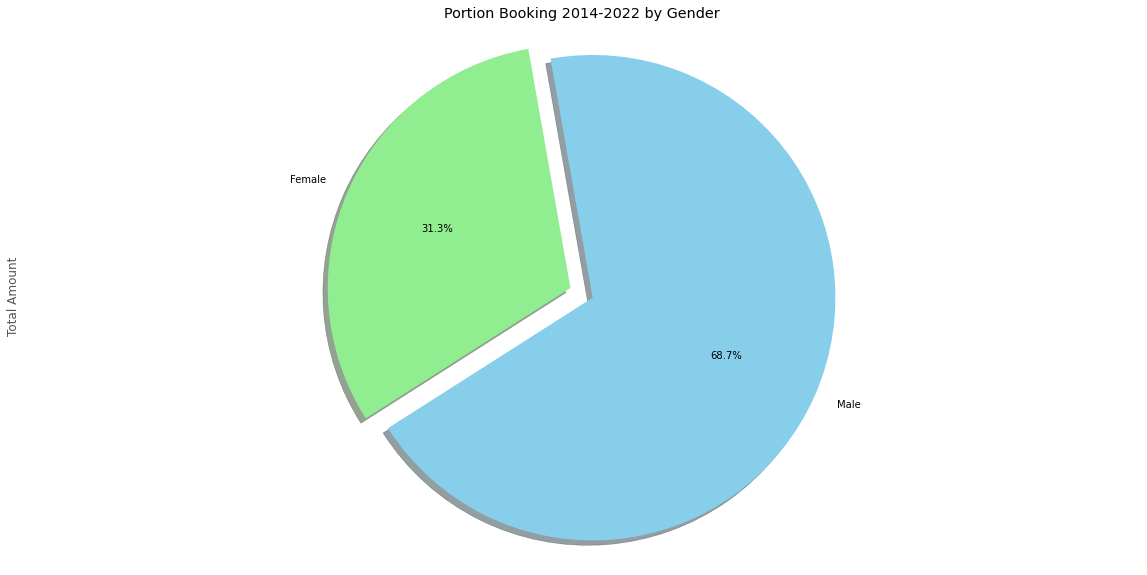

In [32]:
colors_list = ['lightgreen', 'skyblue']
explode_list = [0.1, 0] 
Gender.plot(kind='pie', figsize=(20, 10), autopct='%1.1f%%', startangle=100, shadow=True, colors=colors_list, explode=explode_list)

plt.title('Portion Booking 2014-2022 by Gender')
plt.axis('equal')
plt.show()

Jawaban :
68% Booking Laki-laki dan 31% Perempuan

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Berapa Persen Konsumen PBF yang belum menikah ?

In [33]:
Data.head()

,Branch,Main Customer Purpose,Customer Economy Sector,Customer Marital,Main Customer Profession,Gender,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total Amount
0,Cabang BALIKPAPAN,Consumtive,PERTAMBANGAN,Married,Wiraswasta,Female,0,0,0,1050000000,0,0,0,0,0,1.050000e+09
1,Cabang BALIKPAPAN,Consumtive,PERTAMBANGAN,Married,Karyawan Swasta,Male,0,0,130000000,450000000,0,0,0,0,0,5.800000e+08
2,Cabang BALIKPAPAN,Consumtive,PERDAGANGAN & DISTRIBUSI,Married,Wiraswasta,Male,0,0,0,250000000,0,0,0,0,0,2.500000e+08
3,Cabang BALIKPAPAN,Consumtive,PERDAGANGAN & DISTRIBUSI,Married,Wiraswasta,Female,0,0,75000000,0,0,0,0,0,0,7.500000e+07
4,Cabang BALIKPAPAN,Consumtive,JASA,Married,Karyawan Swasta,Male,0,0,350000000,0,0,0,0,0,0,3.500000e+08


In [34]:
Customer_Marital = Data.groupby(["Customer Marital"], axis = 0).sum()
Customer_Marital = Customer_Marital["Total Amount"]
Customer_Marital

Customer Marital
Married        1.152229e+12
Not Married    2.022023e+11
Name: Total Amount, dtype: float64

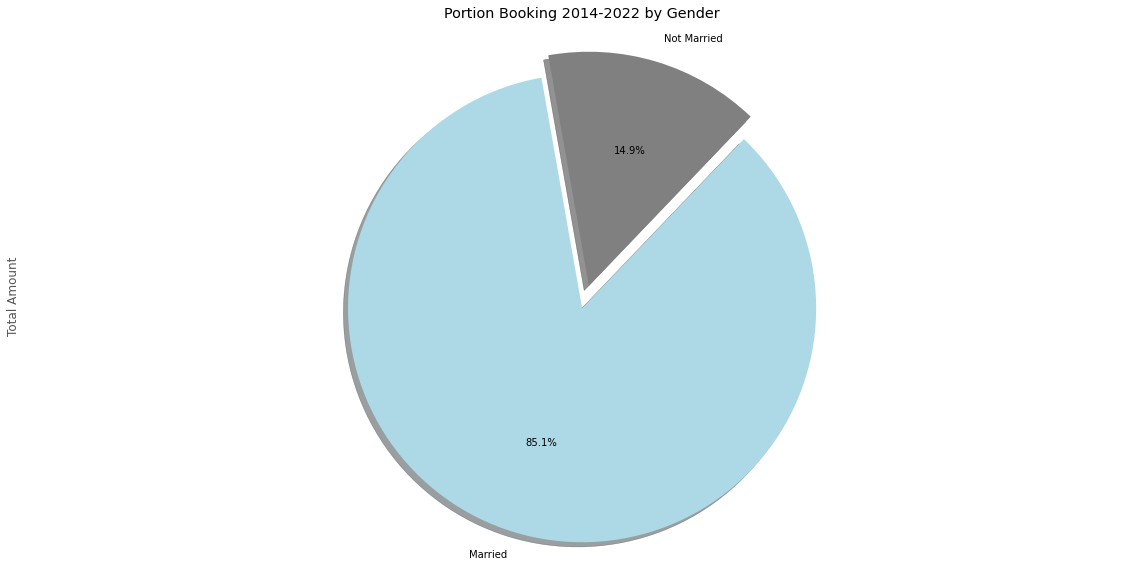

In [35]:
colors_list = ['lightblue', 'grey']
explode_list = [0.1, 0] 
Customer_Marital.plot(kind='pie', figsize=(20, 10), autopct='%1.1f%%', startangle=100, shadow=True, colors=colors_list, explode=explode_list)

plt.title('Portion Booking 2014-2022 by Gender')
plt.axis('equal')
plt.show()

Hanya 15% Konsumen PBF yang belum menikah

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                                                                            (: TERIMA KASIH :)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------